In [27]:
import pandas as pd
import configparser

config = configparser.ConfigParser()
config.read('config.ini')

output_csv_procedures = config['Paths']['output_csv_procedures']
df_proced = pd.read_csv(output_csv_procedures, delimiter=',')

output_csv_subgroups = config['Paths']['output_csv_subgroups']
df_subgrup = pd.read_csv(output_csv_subgroups, delimiter=",")

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df_subgrup['ds'] = pd.to_datetime(df_subgrup['ds'])
df_subgrup.set_index('ds', inplace=True)

In [30]:
unique_values = df_subgrup['unique_id'].unique()
mapping_dict = {value: value[:4] for value in unique_values}
mapping_dict

{'0101 Acoes coletivas/individuais em saude': '0101',
 '0102 Vigilancia em saude': '0102',
 '0201 Coleta de material': '0201',
 '0202 Diagnostico em laboratorio clinico': '0202',
 '0203 Diagnostico por anatomia patologica e citopatologia': '0203',
 '0204 Diagnostico por radiologia': '0204',
 '0205 Diagnostico por ultrasonografia': '0205',
 '0206 Diagnostico por tomografia': '0206',
 '0207 Diagnostico por ressonancia magnetica': '0207',
 '0208 Diagnostico por medicina nuclear in vivo': '0208',
 '0209 Diagnostico por endoscopia': '0209',
 '0210 Diagnostico por radiologia intervencionista': '0210',
 '0211 Metodos diagnosticos em especialidades': '0211',
 '0212 Diagnostico e procedimentos especiais em hemoterapia': '0212',
 '0213 Diagnostico em vigilancia epidemiologica e ambiental': '0213',
 '0214 Diagnostico por teste rapido': '0214',
 '0301 Consultas / Atendimentos / Acompanhamentos': '0301',
 '0302 Fisioterapia': '0302',
 '0303 Tratamentos clinicos (outras especialidades)': '0303',
 '0

In [31]:
df_subgrup['unique_id'] = df_subgrup['unique_id'].map(mapping_dict)


In [32]:
df_subgrup

,unique_id,y
ds,,
2018-01-01,0101,0
2018-02-01,0101,20
2018-03-01,0101,1
2018-04-01,0101,40
2018-05-01,0101,6
...,...,...
2023-05-01,0702,55
2023-06-01,0702,33
2023-07-01,0702,27


In [33]:
df_subgrup.to_csv(f"{output_csv_subgroups}2")

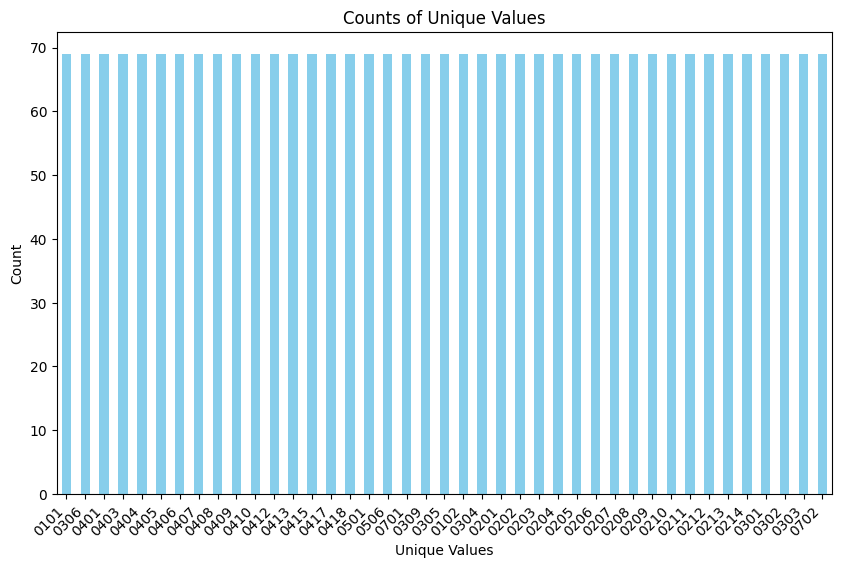

In [34]:
value_counts = df_subgrup['unique_id'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Unique Values')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

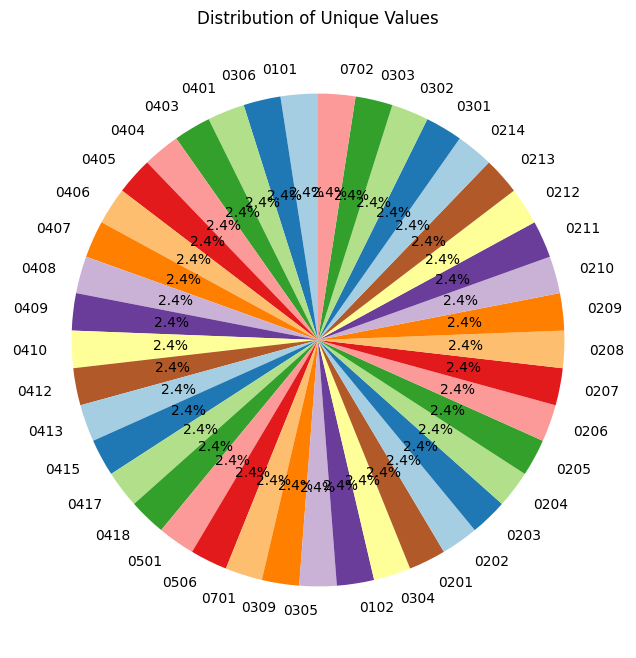

In [35]:
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Unique Values')
plt.show()